# Adding in statistics on mous imaging to database

Values I want to add:
* number of mous in GOUS (all arrays)
* number of 12m MOUS in GOUS
* number of 7m MOUS in GOUS
* number of TP MOUS in GOUS
* max L80 (12m)
* min L80 (12m)
* product size per gous assuming GOUS only imaging (should be equal to GOUS+MOUS - MOUS)
* product size per gous asuming MOUS only imaging (already have -- that's just the initial product size)
* product size per gous assuming GOUS + MOUS imaging
* product size per proposal assuming GOUS only imaging
* product size per proposal assuming MOUS only imaging
* product size per proposal assuming GOUS + MOUS imaging

## import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, QTable
import astropy.units as u
import pandas as pd
import pickle
from importlib import reload
import wsu_plots
import wsu_db
import re

## read in data files

In [2]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20240315_gous_without_band3_nbin3_npol4.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20240315_gous_without_band3_nbin3_npol4.ecsv')

In [3]:
len(result_c7_mous)

2712

In [4]:
len(result_c8_mous)

2480

In [5]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [6]:
len(wsu_all)

5192

In [7]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [8]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','gous','schedblock_name','array','science_keyword','scientific_category_proposal','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x',

In [9]:
result_tp = Table.read('data/tp_database_cycle7_cycle8_permous_20240315.ecsv')

In [10]:
result_tp.columns

<TableColumns names=('mous','proposal_id','gous','schedblock_name','array','science_keyword','scientific_category','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_4x','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_nchan_spw_stepped2','wsu_nchan_agg_stepped2_early','wsu_nchan_agg_stepped2_later_4x','wsu_frac_bw_early','wsu_frac_bw_later_4x','wsu_frac_bw_spw','CYCLE','ESTIMATED_EXECUTION_TIME_PRJ','ESTIMATED_EXECUTION_TIME_PRJ_UNIT','ACASPEC_INTEGRATION_DURATION','EXECOUNT','N_TDUMP')>

## Aggregate information per gous

In [60]:
reload(wsu_db)
test = wsu_db.aggregate_gous_stats(wsu_all,result_tp)

Key aggregation not specified: mous
Key aggregation not specified: schedblock_name
Key aggregation not specified: array
Key aggregation not specified: nant_typical
Key aggregation not specified: nant_array
Key aggregation not specified: nant_all
Key aggregation not specified: blc_npol
Key aggregation not specified: blc_nspw
Key aggregation not specified: blc_specwidth
Key aggregation not specified: blc_freq
Key aggregation not specified: blc_velres
Key aggregation not specified: blc_nchan_agg
Key aggregation not specified: blc_nchan_max
Key aggregation not specified: blc_bandwidth_max
Key aggregation not specified: blc_bandwidth_agg
Key aggregation not specified: wsu_freq
Key aggregation not specified: wsu_npol
Key aggregation not specified: wsu_bandwidth_early
Key aggregation not specified: wsu_bandwidth_later_2x
Key aggregation not specified: wsu_bandwidth_later_4x
Key aggregation not specified: wsu_nspw_later_2x
Key aggregation not specified: wsu_specwidth_finest
Key aggregation not

(array([4.452e+03, 9.500e+01, 1.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

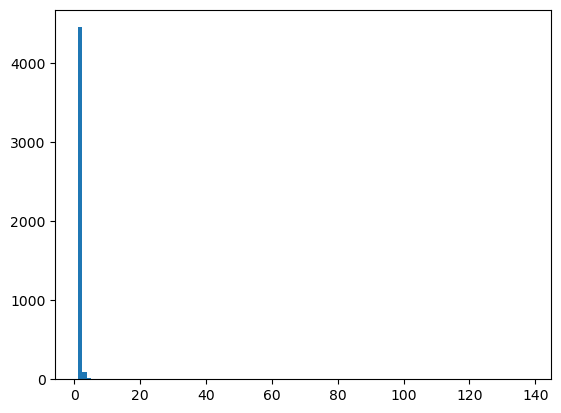

In [66]:
plt.hist(test['n_mous_in_gous'],bins=100)

(array([4.452e+03, 9.500e+01, 1.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

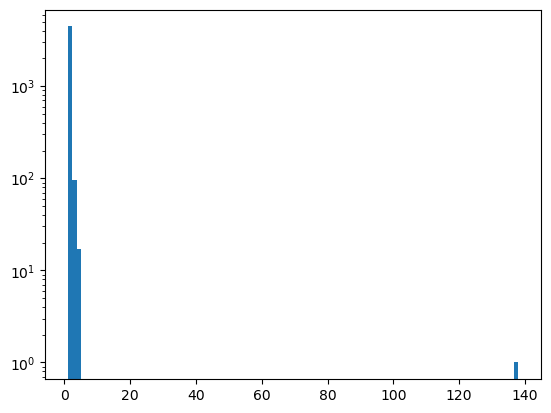

In [67]:
plt.hist(test['n_mous_in_gous'],bins=100,log=True)

In [68]:
np.max(test['n_mous_in_gous'])

138

In [69]:
idx = np.argmax(test['n_mous_in_gous'])
test[idx]['proposal_id','gous','ntarget','n_mous_in_gous','L80_max','L80_min']

proposal_id,gous,ntarget,n_mous_in_gous,L80_max,L80_min
,,,,m,m
str14,str22,float64,int64,float64,float64
2021.1.00172.L,uid://A001/X1590/X30a9,97.0,138,343.87604,26.197487


(array([3901.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  551.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   95.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          17.]),
 array([1.  , 1.03, 1.06, 1.09, 1.12, 1.15, 1.18, 1.21, 1.24, 1.27, 1.3 ,
        1.33, 1.36, 1.39, 1.42, 1.45, 1.48, 1.51, 1.54, 1.57, 1.6 , 1.63,
        1.66, 1.69, 1.72, 1.75, 1.78, 1.81, 1.84, 1.87

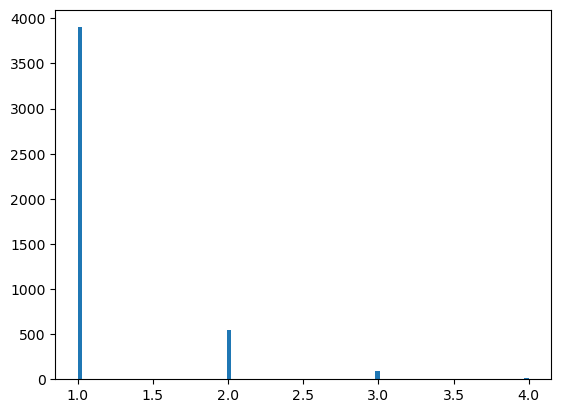

In [70]:
idx = test['n_mous_in_gous'] < 20
plt.hist(test[idx]['n_mous_in_gous'],bins=100)

(array([551.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  95.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         17.]),
 array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
        2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
        2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
        2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
        2.88, 2.9 , 2.

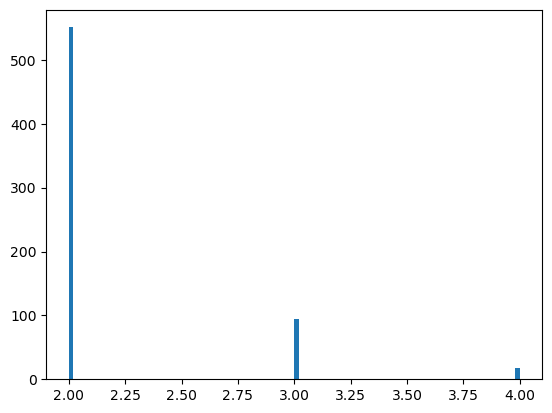

In [71]:
idx = (test['n_mous_in_gous'] < 20) & (test['n_mous_in_gous'] > 1)
plt.hist(test[idx]['n_mous_in_gous'],bins=100)

(array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  64.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         17.]),
 array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
        2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
        2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
        2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
        2.88, 2.9 , 2.

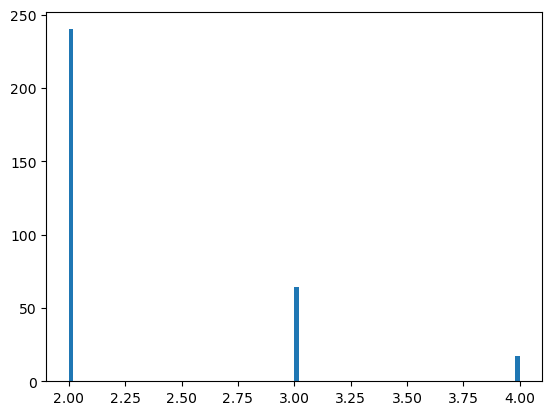

In [72]:
idx =  (test['n_mous_in_gous_12m'] > 1) & (test['n_mous_in_gous'] < 30)
plt.hist(test[idx]['n_mous_in_gous'],bins=100)

(array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 94.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
        2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
        2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
        2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
        2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  , 3.02, 3.04, 3.06, 3.08,
        3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 , 3.22, 3.24, 3.26, 3.

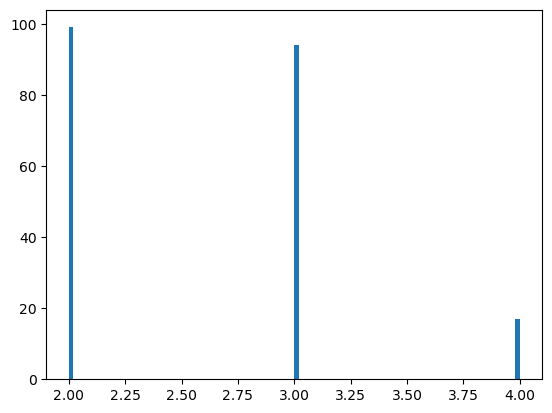

In [73]:
idx =  (test['n_mous_in_gous_12m'] >= 1) & (test['n_mous_in_gous_7m'] >= 1) &(test['n_mous_in_gous'] < 30)
plt.hist(test[idx]['n_mous_in_gous'],bins=100)

(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 ,
        3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 , 3.21,
        3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
        3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 3.42, 3.43,
        3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54,
        3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61, 3.62, 3.63, 3.

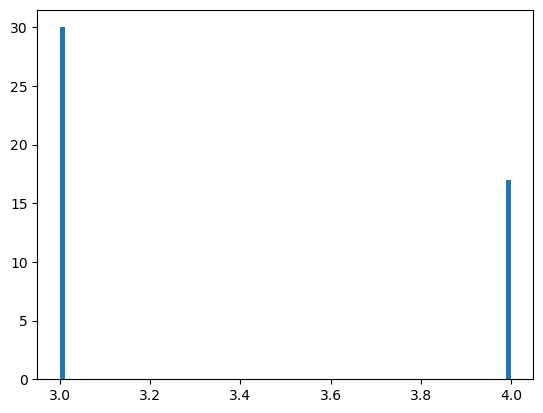

In [74]:
idx =  (test['n_mous_in_gous_12m'] >= 1) & (test['n_mous_in_gous_7m'] >= 1) &  (test['n_mous_in_gous_tp'] >= 1) &(test['n_mous_in_gous'] < 30)
plt.hist(test[idx]['n_mous_in_gous'],bins=100)

In [75]:
test['proposal_id','gous','ntarget']

proposal_id,gous,ntarget
str14,str22,float64
2019.1.01326.S,uid://A001/X1465/X1001,1.0
2019.1.01326.S,uid://A001/X1465/X1007,1.0
2019.1.01326.S,uid://A001/X1465/X100d,1.0
2019.1.01326.S,uid://A001/X1465/X1013,1.0
2019.1.01326.S,uid://A001/X1465/X1019,1.0
2019.1.01326.S,uid://A001/X1465/X101f,1.0
2019.1.01326.S,uid://A001/X1465/X1025,1.0
2019.1.01326.S,uid://A001/X1465/X102b,1.0
...,...,...


In [76]:
len(test[test['n_mous_in_gous'] > 1])

664

In [77]:
len(test)

4565

In [78]:
664/4565

0.14545454545454545

In [79]:
n_mous_tot = np.sum(test['n_mous_in_gous'])
more_than_one_mous_per_gous = np.sum(test[test['n_mous_in_gous']>1]['n_mous_in_gous'])

In [80]:
print(n_mous_tot)

5494


In [81]:
print(more_than_one_mous_per_gous)

1593


In [82]:
1593/5494

0.28995267564615945

In [86]:
np.sum(test['wsu_productsize_early_stepped2_mous_only']).to('PB')/2.0

<Quantity 5.86327451 Pbyte>

In [87]:
np.sum(test['wsu_productsize_early_stepped2_gous_only']).to('PB')/2.0

<Quantity 5.55757646 Pbyte>

In [89]:
np.sum(test['wsu_productsize_early_stepped2_mous_gous']).to('PB')/2.0

<Quantity 8.00538792 Pbyte>

In [90]:
np.sum(test['wsu_productsize_later_4x_stepped2_mous_only']).to('PB')/2.0

<Quantity 12.66841771 Pbyte>

In [91]:
np.sum(test['wsu_productsize_later_4x_stepped2_gous_only']).to('PB')/2.0

<Quantity 12.04470815 Pbyte>

In [92]:
np.sum(test['wsu_productsize_later_4x_stepped2_mous_gous']).to('PB')/2.0

<Quantity 17.28492447 Pbyte>

Text(0, 0.5, 'n_mous_in_gous')

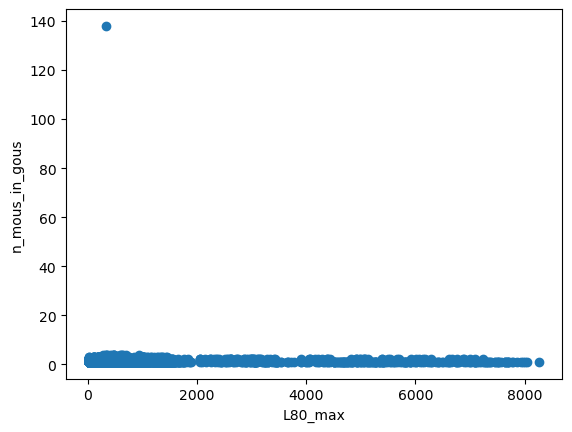

In [99]:
plt.scatter(test['L80_max'], test['n_mous_in_gous'])
#plt.ylim(0,15)
plt.xlabel('L80_max')
plt.ylabel('n_mous_in_gous')

Text(0, 0.5, 'n_mous_in_gous')

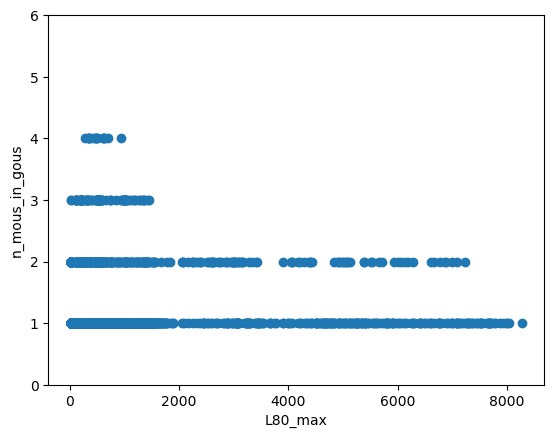

In [101]:
plt.scatter(test['L80_max'], test['n_mous_in_gous'])
plt.ylim(0,6)
plt.xlabel('L80_max')
plt.ylabel('n_mous_in_gous')